In [1]:
%reload_ext autoreload
%autoreload 2


import numpy as np
from shared.models_store import Store

Using TensorFlow backend.


In [3]:
store = Store(None, '../dist/store.json')
store.load()

configuration = store.configuration

In [23]:
import matplotlib.pyplot as plt
from sklearn import metrics
from pylab import rcParams
rcParams['figure.figsize'] = 15, 9

def plot_roc_curve(models):
    # calculate the fpr and tpr for all thresholds of the classification
    plt.title('Receiver Operating Characteristic')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    for model in models:
        y_test, y_prob = model['metadata']['Y Test'], model['metadata']['Y Pred Proba']
        fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob)
        roc_auc = metrics.auc(fpr, tpr)

        plt.plot(fpr, tpr, label='{} AUC = {}'.format(model['name'], round(roc_auc, 2)))
    
    plt.legend(loc='lower right')
    plt.show()
   

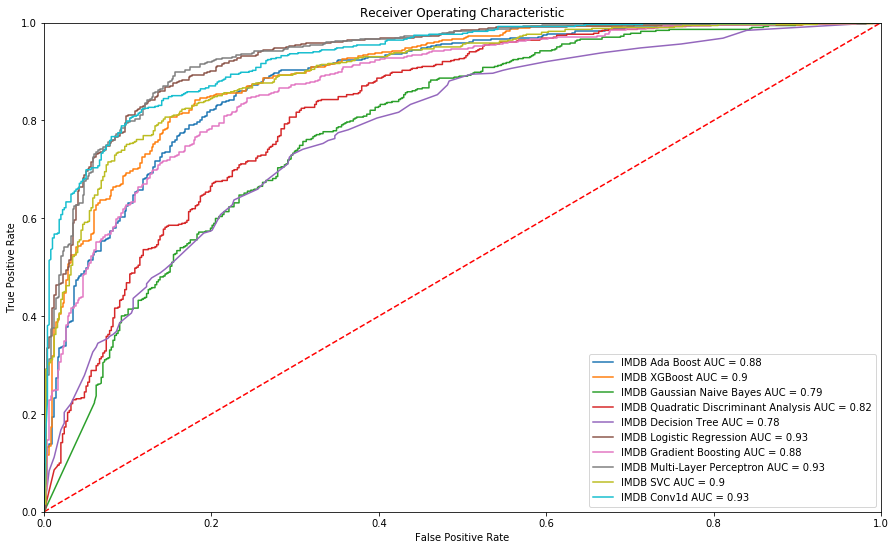

In [24]:
plot_roc_curve([m for m in configuration.values() if m['metadata']['Dataset'] == 'Internet Movie Database'])


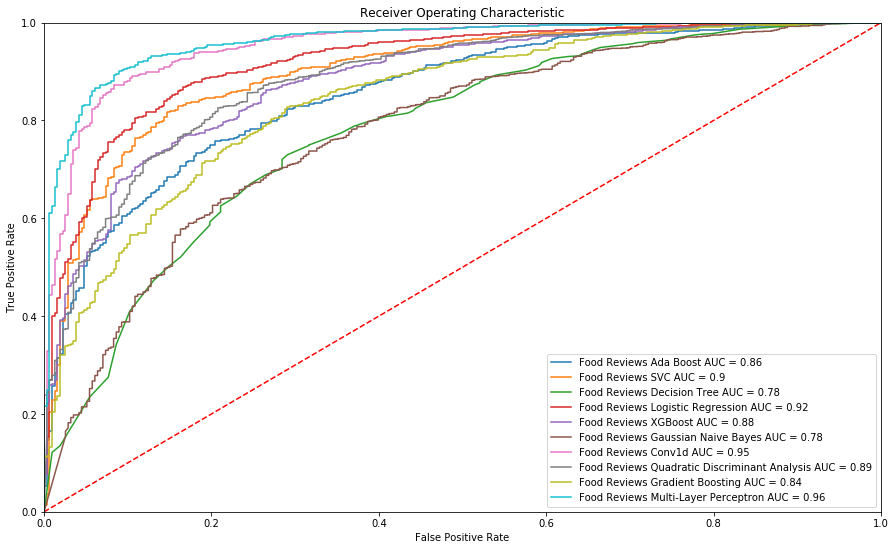

In [25]:
plot_roc_curve([m for m in configuration.values() if m['metadata']['Dataset'] == 'Amazon Fine Food Reviews'])